In [5]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
from itertools import combinations
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM

from numpy import concatenate
from pandas import DataFrame
from math import sqrt

In [6]:
# The path to our CSV file
file = "../data/csv/Gold_Data.csv"
df = pd.read_csv(file)
df.head()

,Business_Week,Gold_Change,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,Ten_Yr_Futures_Change,...,USD_Change,USD_Settle,USD_Volume,USD_Wave,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle,ZAR_Volume,ZAR_Wave,ZAR_Prev. Day Open Interest
0,"[2006-06-07, 2006-06-13]",0.0,602.80,324.800000,189517.8,2006-06-13,382474.0,30916.0,103211.0,0.0,...,1.760,85.7620,7364.2,NaN,38753.4,0.0760,6.7790,65.00,NaN,2332.40
1,"[2006-06-14, 2006-06-20]",0.0,570.50,78.400000,191302.8,2006-06-20,390281.0,30963.0,94632.0,0.0,...,0.013,86.2112,772.6,NaN,37679.6,0.1175,6.9283,45.00,NaN,2276.80
2,"[2006-06-21, 2006-06-27]",0.0,584.18,51.800000,189599.0,2006-06-27,384321.0,32287.0,91042.0,0.0,...,0.340,86.0000,5056.2,NaN,23433.4,0.1715,7.4125,359.25,NaN,2395.75
3,"[2006-06-28, 2006-07-04]",0.0,594.40,31923.666667,297778.0,2006-07-03,392868.0,30452.0,92545.0,0.0,...,-1.300,85.2640,2935.2,NaN,19682.8,-0.2920,7.1685,35.60,NaN,2007.00
4,"[2006-07-05, 2006-07-11]",0.0,634.00,43180.200000,253799.8,2006-07-11,427008.0,27624.0,104213.0,0.0,...,0.230,85.0220,2823.0,NaN,19415.6,0.0960,7.1820,186.20,NaN,2227.00


In [7]:
df = pd.read_csv("../data/csv/Gold_Data.csv",index_col="Business_Week")
print(len(df.columns),len(df.index))

22 684


In [8]:
df = df.drop(df.columns[0],axis=1)
df = df.drop(df.columns[7],axis=1)
df = df.dropna(axis=1)
df = df.dropna()
print(len(df.columns),len(df.index))

16 684


In [9]:
df.head()

,Gold_Settle,Gold_Volume,Gold_Prev. Day Open Interest,Date,Open Interest,Money Manager Shorts,Money Manager Longs,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Business_Week,,,,,,,,,,,,,,,,
"[2006-06-07, 2006-06-13]",602.80,324.800000,189517.8,2006-06-13,382474.0,30916.0,103211.0,105.86250,34971.6,1935826.00,1.760,85.7620,7364.2,38753.4,0.0760,6.7790
"[2006-06-14, 2006-06-20]",570.50,78.400000,191302.8,2006-06-20,390281.0,30963.0,94632.0,105.01875,10278.8,2003874.80,0.013,86.2112,772.6,37679.6,0.1175,6.9283
"[2006-06-21, 2006-06-27]",584.18,51.800000,189599.0,2006-06-27,384321.0,32287.0,91042.0,104.33125,547949.0,2151127.00,0.340,86.0000,5056.2,23433.4,0.1715,7.4125
"[2006-06-28, 2006-07-04]",594.40,31923.666667,297778.0,2006-07-03,392868.0,30452.0,92545.0,104.53125,663508.5,2168869.75,-1.300,85.2640,2935.2,19682.8,-0.2920,7.1685
"[2006-07-05, 2006-07-11]",634.00,43180.200000,253799.8,2006-07-11,427008.0,27624.0,104213.0,104.71250,791971.0,2154420.80,0.230,85.0220,2823.0,19415.6,0.0960,7.1820


In [10]:
target = df["Gold_Settle"]
# target_names = ["negative", "positive"]

In [11]:
data = df.drop(["Gold_Settle", "Date"], axis=1)
feature_names = data.columns
data.head()

,Gold_Volume,Gold_Prev. Day Open Interest,Open Interest,Money Manager Shorts,Money Manager Longs,Ten_Yr_Futures_Settle,Ten_Yr_Futures_Volume,Ten_Yr_Futures_Prev. Day Open Interest,USD_Change,USD_Settle,USD_Volume,USD_Prev. Day Open Interest,ZAR_Change,ZAR_Settle
Business_Week,,,,,,,,,,,,,,
"[2006-06-07, 2006-06-13]",324.800000,189517.8,382474.0,30916.0,103211.0,105.86250,34971.6,1935826.00,1.760,85.7620,7364.2,38753.4,0.0760,6.7790
"[2006-06-14, 2006-06-20]",78.400000,191302.8,390281.0,30963.0,94632.0,105.01875,10278.8,2003874.80,0.013,86.2112,772.6,37679.6,0.1175,6.9283
"[2006-06-21, 2006-06-27]",51.800000,189599.0,384321.0,32287.0,91042.0,104.33125,547949.0,2151127.00,0.340,86.0000,5056.2,23433.4,0.1715,7.4125
"[2006-06-28, 2006-07-04]",31923.666667,297778.0,392868.0,30452.0,92545.0,104.53125,663508.5,2168869.75,-1.300,85.2640,2935.2,19682.8,-0.2920,7.1685
"[2006-07-05, 2006-07-11]",43180.200000,253799.8,427008.0,27624.0,104213.0,104.71250,791971.0,2154420.80,0.230,85.0220,2823.0,19415.6,0.0960,7.1820


In [12]:
X = data
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)

(684, 14) (684, 1)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8570774197954365
Testing Score: 0.8501204171888397


Text(0.5, 1.0, 'Residual Plot')

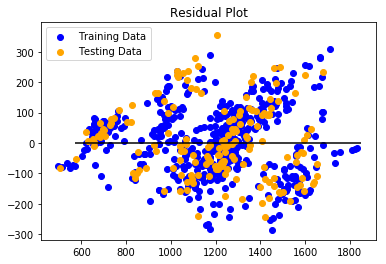

In [16]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [17]:
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 14071.234200273042
R-squared (R2 ): 0.8501204171888398


In [18]:
model.score(X_test, y_test)

0.8501204171888397

In [19]:
# Scaled Analysis

In [20]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

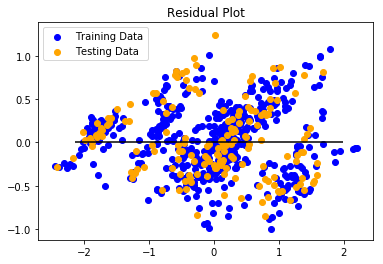

In [26]:
# Plot the results 

model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.17086225094127974, R2: 0.8501204171886507
